In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
import spacy
from collections import Counter
import re

In [4]:
from datasets import load_dataset

ds = load_dataset("DataForGood/ome-hackathon-season-14")

/Users/quentin/miniconda3/envs/dataforgood/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df = pd.DataFrame(ds['train'])
df.head()

channel_title channel_name country  segment_id  \
0      France 2      france2  france        2732   
1           TF1          tf1  france        3973   
2      France 2      france2  france        5788   
3            M6           m6  france        3445   
4           TF1          tf1  france         354   

                   segment_start                    segment_end  \
0  2025-06-19 07:06:11.061 +0200  2025-06-19 07:07:25.070 +0200   
1  2025-10-08 20:18:42.012 +0200  2025-10-08 20:19:46.044 +0200   
2  2025-12-03 06:34:04.031 +0100  2025-12-03 06:36:02.025 +0100   
3  2025-11-17 15:20:24.048 +0100  2025-11-17 15:21:26.064 +0100   
4  2025-01-30 08:44:59.024 +0100  2025-01-30 08:46:29.034 +0100   

   duration_seconds  num_keywords  avg_density  \
0                74             9          8.1   
1                64            12         11.0   
2               118            18         13.4   
3                62             4          5.3   
4                90             9          8.1   

                                              themes  \
0  attenuation_climatique_solutions, biodiversite...   
1  biodiversite_causes, biodiversite_concepts_gen...   
2  , attenuation_climatique_solutions_indirectes,...   
3  , biodiversite_causes_indirectes, changement_c...   
4  attenuation_climatique_solutions, biodiversite...   

                                         report_text  \
0  ne parviennent pas à toutes les évacuer ces al...   
1  plus important était réalisée il faut souligne...   
2  plus vendu au monde a la une également cette c...   
3  christo popov thomas fersen ces enseignants et...   
4  ce sont nos confrères du figaro qui nous en pa...   

                   category secondary_categories text_type  
0                     other                   []   segment  
1        mobility_transport                   []   segment  
2  agriculture_alimentation             [energy]   segment  
3  agriculture_alimentation                   []   segment  
4                     other                   []    report

In [6]:
df.info

<bound method DataFrame.info of      channel_title channel_name country  segment_id  \
0         France 2      france2  france        2732   
1              TF1          tf1  france        3973   
2         France 2      france2  france        5788   
3               M6           m6  france        3445   
4              TF1          tf1  france         354   
...            ...          ...     ...         ...   
8344      France 2      france2  france        3614   
8345           TF1          tf1  france        4712   
8346      France 2      france2  france        2126   
8347  France 3-idf      fr3-idf  france         778   
8348      France 2      france2  france        5205   

                      segment_start                    segment_end  \
0     2025-06-19 07:06:11.061 +0200  2025-06-19 07:07:25.070 +0200   
1     2025-10-08 20:18:42.012 +0200  2025-10-08 20:19:46.044 +0200   
2     2025-12-03 06:34:04.031 +0100  2025-12-03 06:36:02.025 +0100   
3     2025-11-17 15:20:24.0

In [7]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8349   │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 13     │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column                ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25    ┃ p50    ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ segment_id            │   0 │      0 │    2446 │    1529 │   2 │   1188 │   2324 │  3461 │  6214 │ ▇██▆▃▂  │  │
│ │ duration_seconds      │   0 │      0 │   141.3 │    80.9 │  60 │     83 │    108 │   185 │   765 │   █▂▁   │  │
│ │ num_keywords          │   0 │      0 │   15.32 │    9.06 │   3 │      8 │     13 │    20 │    60 │  █▅▃▁   │  │
│ │ avg_density           │   0 │      0 │   11.33 │   5.988 │   3 │      7 │   10.1 │  14.2 │  58.8 │   █▄▁   │  │
│ └───────────────────────┴─────┴────────┴─────────┴─────────┴─────┴────────┴────────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ channel_t │  0 │    0 │ M6        │ France    │ France 2  │ TF1       │      6.28 │       1.5 │      12858 │  │
│ │ itle      │    │      │           │ 3-idf     │           │           │           │           │            │  │
│ │ channel_n │  0 │    0 │ m6        │ france2   │ fr3-idf   │ tf1       │      4.98 │         1 │       8349 │  │
│ │ ame       │    │      │           │           │           │           │           │           │            │  │
│ │ country   │  0 │    0 │ france    │ france    │ france    │ france    │         6 │         1 │       8349 │  │
│ │ segment_s │  0 │    0 │ 2025-06-1 │ 2025-06-1 │ 2025-01-0 │ 2025-12-3 │        29 │         3 │      25047 │  │
│ │ tart      │    │      │ 9         │ 9         │ 1         │ 1         │           │           │            │  │
│ │           │    │      │ 07:06:11. │ 07:06:11. │ 06:08:14. │ 20:32:28. │           │           │            │  │
│ │           │    │      │ 061 +0200 │ 061 +0200 │ 001 +0100 │ 071 +0100 │           │           │            │  │
│ │ segment_e │  0 │    0 │ 2025-06-1 │ 2025-06-1 │ 2025-01-0 │ 2025-12-3 │        29 │         3 │      25047 │  │
│ │ nd        │    │      │ 9         │ 9         │ 1         │ 1         │           │           │            │  │
│ │           │    │      │ 07:07:25. │ 07:07:25. │ 06:0

In [8]:
df['themes']

0       attenuation_climatique_solutions, biodiversite...
1       biodiversite_causes, biodiversite_concepts_gen...
2       , attenuation_climatique_solutions_indirectes,...
3       , biodiversite_causes_indirectes, changement_c...
4       attenuation_climatique_solutions, biodiversite...
                              ...                        
8344    attenuation_climatique_solutions, biodiversite...
8345    , biodiversite_concepts_generaux_indirectes, c...
8346    attenuation_climatique_solutions_indirectes, b...
8347    adaptation_climatique_solutions, attenuation_c...
8348    biodiversite_causes_indirectes, biodiversite_c...
Name: themes, Length: 8349, dtype: object

In [9]:
# Toutes les valeurs uniques de category
print("Catégories uniques:")
print(df['category'].unique())
print(f"\nNombre de catégories uniques: {df['category'].nunique()}")
print("\nDistribution des catégories:")
print(df['category'].value_counts())

Catégories uniques:
['other' 'mobility_transport' 'agriculture_alimentation' 'energy']

Nombre de catégories uniques: 4

Distribution des catégories:
category
other                       2903
agriculture_alimentation    2565
mobility_transport          1727
energy                      1154
Name: count, dtype: int64


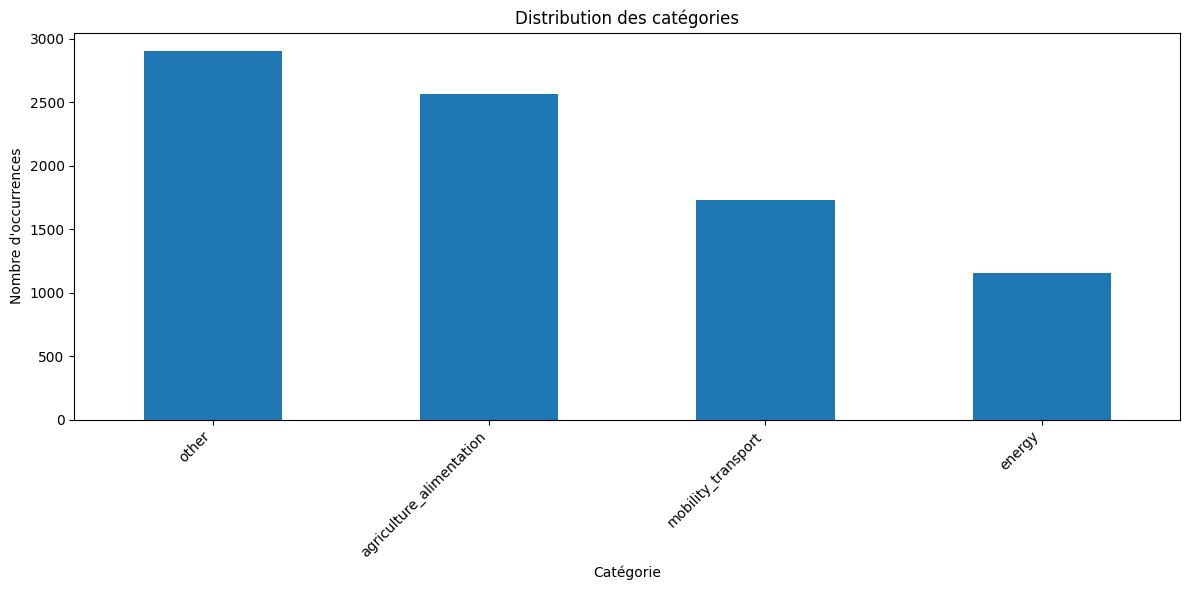

In [10]:
# Visualisation de la distribution des catégories
plt.figure(figsize=(12, 6))
df['category'].value_counts().plot(kind='bar')
plt.title('Distribution des catégories')
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
# Filtrer le dataset sur la catégorie agriculture_alimentation
df_agri = df[df['category'] == 'agriculture_alimentation']
print(f"Nombre d'observations dans la catégorie agriculture_alimentation: {len(df_agri)}")
print(f"\nPourcentage du dataset total: {len(df_agri)/len(df)*100:.2f}%")
print(f"\nAperçu des données filtrées:")
df_agri.head(10)

Nombre d'observations dans la catégorie agriculture_alimentation: 2565

Pourcentage du dataset total: 30.72%

Aperçu des données filtrées:


channel_title channel_name country  segment_id  \
2       France 2      france2  france        5788   
3             M6           m6  france        3445   
9             M6           m6  france        1379   
14           TF1          tf1  france        4852   
17      France 2      france2  france        5744   
20      France 2      france2  france        2000   
21            M6           m6  france        3667   
23  France 3-idf      fr3-idf  france        3499   
24            M6           m6  france         830   
28           TF1          tf1  france        1228   

                    segment_start                    segment_end  \
2   2025-12-03 06:34:04.031 +0100  2025-12-03 06:36:02.025 +0100   
3   2025-11-17 15:20:24.048 +0100  2025-11-17 15:21:26.064 +0100   
9   2025-05-13 20:14:11.059 +0200  2025-05-13 20:15:50.004 +0200   
14  2025-12-25 09:11:59.056 +0100  2025-12-25 09:13:11.082 +0100   
17  2025-11-30 07:36:06.090 +0100  2025-11-30 07:38:37.058 +0100   
20  2025-05-07 06:42:01.096 +0200  2025-05-07 06:44:57.032 +0200   
21  2025-12-09 13:18:27.001 +0100  2025-12-09 13:19:43.024 +0100   
23  2025-12-31 12:10:01.042 +0100  2025-12-31 12:11:44.095 +0100   
24  2025-03-21 20:08:42.054 +0100  2025-03-21 20:11:03.066 +0100   
28  2025-04-10 08:32:11.013 +0200  2025-04-10 08:33:14.007 +0200   

    duration_seconds  num_keywords  avg_density  \
2                118            18         13.4   
3                 62             4          5.3   
9                 99             8          8.1   
14                72            15         17.2   
17               151            11         10.5   
20               176            22         16.0   
21                76            16         23.6   
23               103            11         14.2   
24               141            32         23.3   
28                63             4          4.3   

                                               themes  \
2   , attenuation_climatique_solutions_indirectes,...   
3   , biodiversite_causes_indirectes, changement_c...   
9   attenuation_climatique_solutions_indirectes, b...   
14  adaptation_climatique_solutions, attenuation_c...   
17  biodiversite_causes, biodiversite_concepts_gen...   
20  , adaptation_climatique_solutions_indirectes, ...   
21  , adaptation_climatique_solutions_indirectes, ...   
23  , biodiversite_concepts_generaux_indirectes, c...   
24  , attenuation_climatique_solutions, biodiversi...   
28  , biodiversite_concepts_generaux_indirectes, c...   

                                          report_text  \
2   plus vendu au monde a la une également cette c...   
3   christo popov thomas fersen ces enseignants et...   
9   la baignade tourne court sera <unk> occasion d...   
14  le jardin ce ne sont pas uniquement des matièr...   
17  aux etats-unis que pensez-vous d' aller faire ...   
20  l' après-midi sur la moitié sud du pays côté t...   
21  premier long métrage sans son compère gustave ...   
23  quatorze et quinze degrés assurance bertrand l...   
24  mais encore faut-il le savoir moi dans mon cer...   
28  poupon julia scher sur place ça c' est un de n...   

                    category  secondary_categories text_type  
2   agriculture_alimentation              [energy]   segment  
3   agriculture_alimentation                    []   segment  
9   agriculture_alimentation                    []   segment  
14  agriculture_alimentation                    []   segment  
17  agriculture_alimentation                    []   segment  
20  agriculture_alimentation                    []    report  
21  agriculture_alimentation  [mobility_transport]   segment  
23  agriculture_alimentation                    []   segment  
24  agriculture_alimentation              [energy]   segment  
28  agriculture_alimentation                    []    report

## Text Deduplication Preprocessing

Apply deduplication to remove repetitive text loops before NER processing.

In [13]:
# Import deduplication utilities  
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))

from preprocessing.deduplication import preprocess_dataframe, get_deduplication_stats

print("📊 Analyzing text repetition patterns in agriculture data...")

# Get stats before deduplication
stats_before = get_deduplication_stats(df_agri)

print(f"\nBEFORE DEDUPLICATION:")
print(f"Records: {stats_before['total_records']:,}")
print(f"Records with loops: {stats_before['records_with_loops']:,} ({stats_before['records_with_loops']/stats_before['total_records']*100:.1f}%)")
print(f"Total characters: {stats_before['original_total_chars']:,}")

print("\n🔧 Applying deduplication preprocessing...")

# Apply deduplication to clean repetitive text loops
df_agri_clean = preprocess_dataframe(df_agri.copy(), text_column="report_text", verify=True)

# Get stats after deduplication
stats_after = get_deduplication_stats(df_agri_clean)

print(f"\nAFTER DEDUPLICATION:")
print(f"Compression ratio: {stats_before['compression_ratio']:.1f}x")
print(f"Characters: {stats_before['original_total_chars']:,} → {stats_after['deduplicated_total_chars']:,}")
print(f"Space saved: {(1 - stats_after['deduplicated_total_chars']/stats_before['original_total_chars'])*100:.1f}%")

print("✅ Deduplication complete! Using cleaned dataset for NER processing.")

# Update the dataframe for subsequent processing
df_agri = df_agri_clean

📊 Analyzing text repetition patterns in agriculture data...

BEFORE DEDUPLICATION:
Records: 2,565
Records with loops: 2,484 (96.8%)
Total characters: 83,158,047

🔧 Applying deduplication preprocessing...

AFTER DEDUPLICATION:
Compression ratio: 11.1x
Characters: 83,158,047 → 7,499,270
Space saved: 91.0%
✅ Deduplication complete! Using cleaned dataset for NER processing.


## Analyse des thèmes

In [14]:
# Analyse des thèmes
print("Exemple de thèmes:")
print(df_agri['themes'].head(10))
print(f"\nNombre total de thèmes uniques: {df['themes'].nunique()}")

Exemple de thèmes:
2     , attenuation_climatique_solutions_indirectes,...
3     , biodiversite_causes_indirectes, changement_c...
9     attenuation_climatique_solutions_indirectes, b...
14    adaptation_climatique_solutions, attenuation_c...
17    biodiversite_causes, biodiversite_concepts_gen...
20    , adaptation_climatique_solutions_indirectes, ...
21    , adaptation_climatique_solutions_indirectes, ...
23    , biodiversite_concepts_generaux_indirectes, c...
24    , attenuation_climatique_solutions, biodiversi...
28    , biodiversite_concepts_generaux_indirectes, c...
Name: themes, dtype: object

Nombre total de thèmes uniques: 6297


## Statistiques descriptives

In [15]:
# Informations générales sur le dataset
print(f"Nombre total d'observations: {len(df_agri)}")
print(f"Nombre de colonnes: {len(df.columns)}")
print(f"\nNom des colonnes:")
print(df.columns.tolist())
print(f"\nTypes de données:")
print(df.dtypes)
print(f"\nValeurs manquantes:")
print(df.isnull().sum())

Nombre total d'observations: 2565
Nombre de colonnes: 14

Nom des colonnes:
['channel_title', 'channel_name', 'country', 'segment_id', 'segment_start', 'segment_end', 'duration_seconds', 'num_keywords', 'avg_density', 'themes', 'report_text', 'category', 'secondary_categories', 'text_type']

Types de données:
channel_title            object
channel_name             object
country                  object
segment_id                int64
segment_start            object
segment_end              object
duration_seconds          int64
num_keywords              int64
avg_density             float64
themes                   object
report_text              object
category                 object
secondary_categories     object
text_type                object
dtype: object

Valeurs manquantes:
channel_title           0
channel_name            0
country                 0
segment_id              0
segment_start           0
segment_end             0
duration_seconds        0
num_keywords            

## NER

In [16]:
import os
os.system("python -m spacy download fr_core_news_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 13.0 MB/s  0:00:01 eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


0

In [17]:
import spacy

# Load French NER model
nlp = spacy.load("fr_core_news_sm")

In [30]:
def clean_text(text: str) -> str:
    """Clean text before NER processing"""
    if not isinstance(text, str):
        return ""
    # Remove extra whitespace and special chars
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def extract_actors(text: str, max_chars: int = 5000):
    """Extract persons, organizations, locations, and misc entities from text using spaCy NER
    
    Args:
        text: Input text (should be deduplicated)
        max_chars: Maximum characters to process (for very long texts)
    """
    if not isinstance(text, str) or not text.strip():
        return {"person": [], "organization": [], "location": [], "misc": []}
    
    # Clean text (text should already be deduplicated)
    text = clean_text(text)
    
    # For very long texts, process in chunks to avoid memory issues
    persons = []
    organizations = []
    locations = []
    misc = []
    
    # Process text in chunks if it's very long
    chunk_size = max_chars
    for i in range(0, len(text), chunk_size):
        chunk = text[i:i + chunk_size]
        
        # Ensure we don't cut in the middle of a word
        if i + chunk_size < len(text):
            last_space = chunk.rfind(' ')
            if last_space > chunk_size * 0.8:  # Only adjust if space is not too far back
                chunk = chunk[:last_space]
        
        # Process chunk with spaCy
        doc = nlp(chunk)
        
        # Extract named entities
        for ent in doc.ents:
            entity_text = ent.text.strip().lower()  # Normalize to lowercase
            # Filter out very short entities, numbers, and common false positives
            if (len(entity_text) > 2 and 
                not entity_text.isdigit() and 
                len(entity_text.split()) <= 4):  # Avoid very long false positives
                
                if ent.label_ == "PER":
                    persons.append(entity_text)
                elif ent.label_ == "ORG":
                    organizations.append(entity_text)
                elif ent.label_ == "LOC":
                    locations.append(entity_text)
                elif ent.label_ == "MISC":
                    misc.append(entity_text)
    
    return {
        "person": list(set(persons)),
        "organization": list(set(organizations)),
        "location": list(set(locations)),
        "misc": list(set(misc))
    }

# Apply NER extraction with improved preprocessing
print("🧠 Starting NER extraction on deduplicated text...")
print(f"Processing {len(df_agri)} documents...")

import time
from tqdm import tqdm
tqdm.pandas(desc="NER Processing")

# Apply NER extraction with improved preprocessing
print("🧠 Starting NER extraction on deduplicated text...")
print(f"Processing {len(df_agri)} documents...")

import time
from tqdm import tqdm
tqdm.pandas(desc="NER Processing")

start_time = time.time()

# Apply the updated extraction function with progress bar
actor_data = df_agri['report_text'].progress_apply(extract_actors)

end_time = time.time()
processing_time = end_time - start_time

df_agri["actor_persons"] = actor_data.apply(lambda d: d["person"])
df_agri["actor_organizations"] = actor_data.apply(lambda d: d["organization"])
df_agri["actor_locations"] = actor_data.apply(lambda d: d["location"])
df_agri["actor_misc"] = actor_data.apply(lambda d: d["misc"])

df_agri["actor"] = actor_data.apply(lambda d: {
    "persons": d["person"],
    "organizations": d["organization"],
    "locations": d["location"],
    "misc": d["misc"]
})

print(f"✅ NER extraction completed in {processing_time:.1f} seconds!")
print(f"⚡ Average processing time: {processing_time/len(df_agri):.3f}s per document")
print(f"📊 Processing rate: {len(df_agri)/processing_time:.1f} documents/second")

🧠 Starting NER extraction on deduplicated text...
Processing 2565 documents...
🧠 Starting NER extraction on deduplicated text...
Processing 2565 documents...


NER Processing: 100%|██████████| 2565/2565 [02:02<00:00, 20.98it/s]

✅ NER extraction completed in 122.2 seconds!
⚡ Average processing time: 0.048s per document
📊 Processing rate: 21.0 documents/second


## Improved NER Processing with Deduplication

The updated approach now:
- ✅ **Removes repetitive text loops** instead of just truncating
- ✅ **Processes complete content** rather than only first 2000 characters  
- ✅ **Handles long texts** with intelligent chunking
- ✅ **Improves accuracy** by working with clean, deduplicated data
- ✅ **Reduces processing time** by eliminating redundant text

In [31]:
df_agri.head(10)

channel_title channel_name country  segment_id  \
2       France 2      france2  france        5788   
3             M6           m6  france        3445   
9             M6           m6  france        1379   
14           TF1          tf1  france        4852   
17      France 2      france2  france        5744   
20      France 2      france2  france        2000   
21            M6           m6  france        3667   
23  France 3-idf      fr3-idf  france        3499   
24            M6           m6  france         830   
28           TF1          tf1  france        1228   

                    segment_start                    segment_end  \
2   2025-12-03 06:34:04.031 +0100  2025-12-03 06:36:02.025 +0100   
3   2025-11-17 15:20:24.048 +0100  2025-11-17 15:21:26.064 +0100   
9   2025-05-13 20:14:11.059 +0200  2025-05-13 20:15:50.004 +0200   
14  2025-12-25 09:11:59.056 +0100  2025-12-25 09:13:11.082 +0100   
17  2025-11-30 07:36:06.090 +0100  2025-11-30 07:38:37.058 +0100   
20  2025-05-07 06:42:01.096 +0200  2025-05-07 06:44:57.032 +0200   
21  2025-12-09 13:18:27.001 +0100  2025-12-09 13:19:43.024 +0100   
23  2025-12-31 12:10:01.042 +0100  2025-12-31 12:11:44.095 +0100   
24  2025-03-21 20:08:42.054 +0100  2025-03-21 20:11:03.066 +0100   
28  2025-04-10 08:32:11.013 +0200  2025-04-10 08:33:14.007 +0200   

    duration_seconds  num_keywords  avg_density  \
2                118            18         13.4   
3                 62             4          5.3   
9                 99             8          8.1   
14                72            15         17.2   
17               151            11         10.5   
20               176            22         16.0   
21                76            16         23.6   
23               103            11         14.2   
24               141            32         23.3   
28                63             4          4.3   

                                               themes  \
2   , attenuation_climatique_solutions_indirectes,...   
3   , biodiversite_causes_indirectes, changement_c...   
9   attenuation_climatique_solutions_indirectes, b...   
14  adaptation_climatique_solutions, attenuation_c...   
17  biodiversite_causes, biodiversite_concepts_gen...   
20  , adaptation_climatique_solutions_indirectes, ...   
21  , adaptation_climatique_solutions_indirectes, ...   
23  , biodiversite_concepts_generaux_indirectes, c...   
24  , attenuation_climatique_solutions, biodiversi...   
28  , biodiversite_concepts_generaux_indirectes, c...   

                                          report_text  \
2   plus vendu au monde a la une également cette c...   
3   christo popov thomas fersen ces enseignants et...   
9   la baignade tourne court sera <unk> occasion d...   
14  le jardin ce ne sont pas uniquement des matièr...   
17  aux etats-unis que pensez-vous d' aller faire ...   
20  l' après-midi sur la moitié sud du pays côté t...   
21  premier long métrage sans son compère gustave ...   
23  quatorze et quinze degrés assurance bertrand l...   
24  mais encore faut-il le savoir moi dans mon cer...   
28  poupon julia scher sur place ça c' est un de n...   

                    category  secondary_categories text_type  \
2   agriculture_alimentation              [energy]   segment   
3   agriculture_alimentation                    []   segment   
9   agriculture_alimentation                    []   segment   
14  agriculture_alimentation                    []   segment   
17  agriculture_alimentation                    []   segment   
20  agriculture_alimentation                    []    report   
21  agriculture_alimentation  [mobility_transport]   segment   
23  agriculture_alimentation                    []   segment   
24  agriculture_alimentation              [energy]   segment   
28  agriculture_alimentation                    []    report   

                                        actor_persons   actor_organizations  \
2                                           [mathieu]               

In [32]:
# Analyse détaillée des acteurs extraits
print("="*80)
print("ANALYSE DÉTAILLÉE DES ENTITÉS EXTRAITES")
print("="*80)

# Collecter toutes les entités
all_persons = []
all_orgs = []
all_locations = []
all_misc = []

for persons_list in df_agri['actor_persons']:
    all_persons.extend(persons_list)
for orgs_list in df_agri['actor_organizations']:
    all_orgs.extend(orgs_list)
for locations_list in df_agri['actor_locations']:
    all_locations.extend(locations_list)
for misc_list in df_agri['actor_misc']:
    all_misc.extend(misc_list)

# Statistiques globales
print(f"\nNombre total d'occurrences de personnes: {len(all_persons)}")
print(f"Nombre de personnes uniques: {len(set(all_persons))}")
print(f"\nNombre total d'occurrences d'organisations: {len(all_orgs)}")
print(f"Nombre d'organisations uniques: {len(set(all_orgs))}")
print(f"\nNombre total d'occurrences de lieux: {len(all_locations)}")
print(f"Nombre de lieux uniques: {len(set(all_locations))}")
print(f"\nNombre total d'occurrences d'entités diverses: {len(all_misc)}")
print(f"Nombre d'entités diverses uniques: {len(set(all_misc))}")

# Top 20 personnes
print("\n" + "="*80)
print("TOP 20 PERSONNES LES PLUS MENTIONNÉES")
print("="*80)
persons_counter = Counter(all_persons)
for person, count in persons_counter.most_common(20):
    print(f"  {person:50s} | {count:3d} occurrences")

# Top 20 organisations
print("\n" + "="*80)
print("TOP 20 ORGANISATIONS LES PLUS MENTIONNÉES")
print("="*80)
orgs_counter = Counter(all_orgs)
for org, count in orgs_counter.most_common(20):
    print(f"  {org:50s} | {count:3d} occurrences")

# Top 20 lieux
print("\n" + "="*80)
print("TOP 20 LIEUX LES PLUS MENTIONNÉS")
print("="*80)
locations_counter = Counter(all_locations)
for location, count in locations_counter.most_common(20):
    print(f"  {location:50s} | {count:3d} occurrences")

# Top 20 entités diverses
print("\n" + "="*80)
print("TOP 20 ENTITÉS DIVERSES LES PLUS MENTIONNÉES")
print("="*80)
misc_counter = Counter(all_misc)
for misc_entity, count in misc_counter.most_common(20):
    print(f"  {misc_entity:50s} | {count:3d} occurrences")

ANALYSE DÉTAILLÉE DES ENTITÉS EXTRAITES

Nombre total d'occurrences de personnes: 4935
Nombre de personnes uniques: 3248

Nombre total d'occurrences d'organisations: 814
Nombre d'organisations uniques: 345

Nombre total d'occurrences de lieux: 7615
Nombre de lieux uniques: 1686

Nombre total d'occurrences d'entités diverses: 884
Nombre d'entités diverses uniques: 505

TOP 20 PERSONNES LES PLUS MENTIONNÉES
  donald trump                                       |  81 occurrences
  emmanuel macron                                    |  51 occurrences
  frédéric                                           |  40 occurrences
  ben                                                |  31 occurrences
  françois bayrou                                    |  30 occurrences
  philippe                                           |  27 occurrences
  mathieu                                            |  26 occurrences
  thomas                                             |  25 occurrences
  julia                

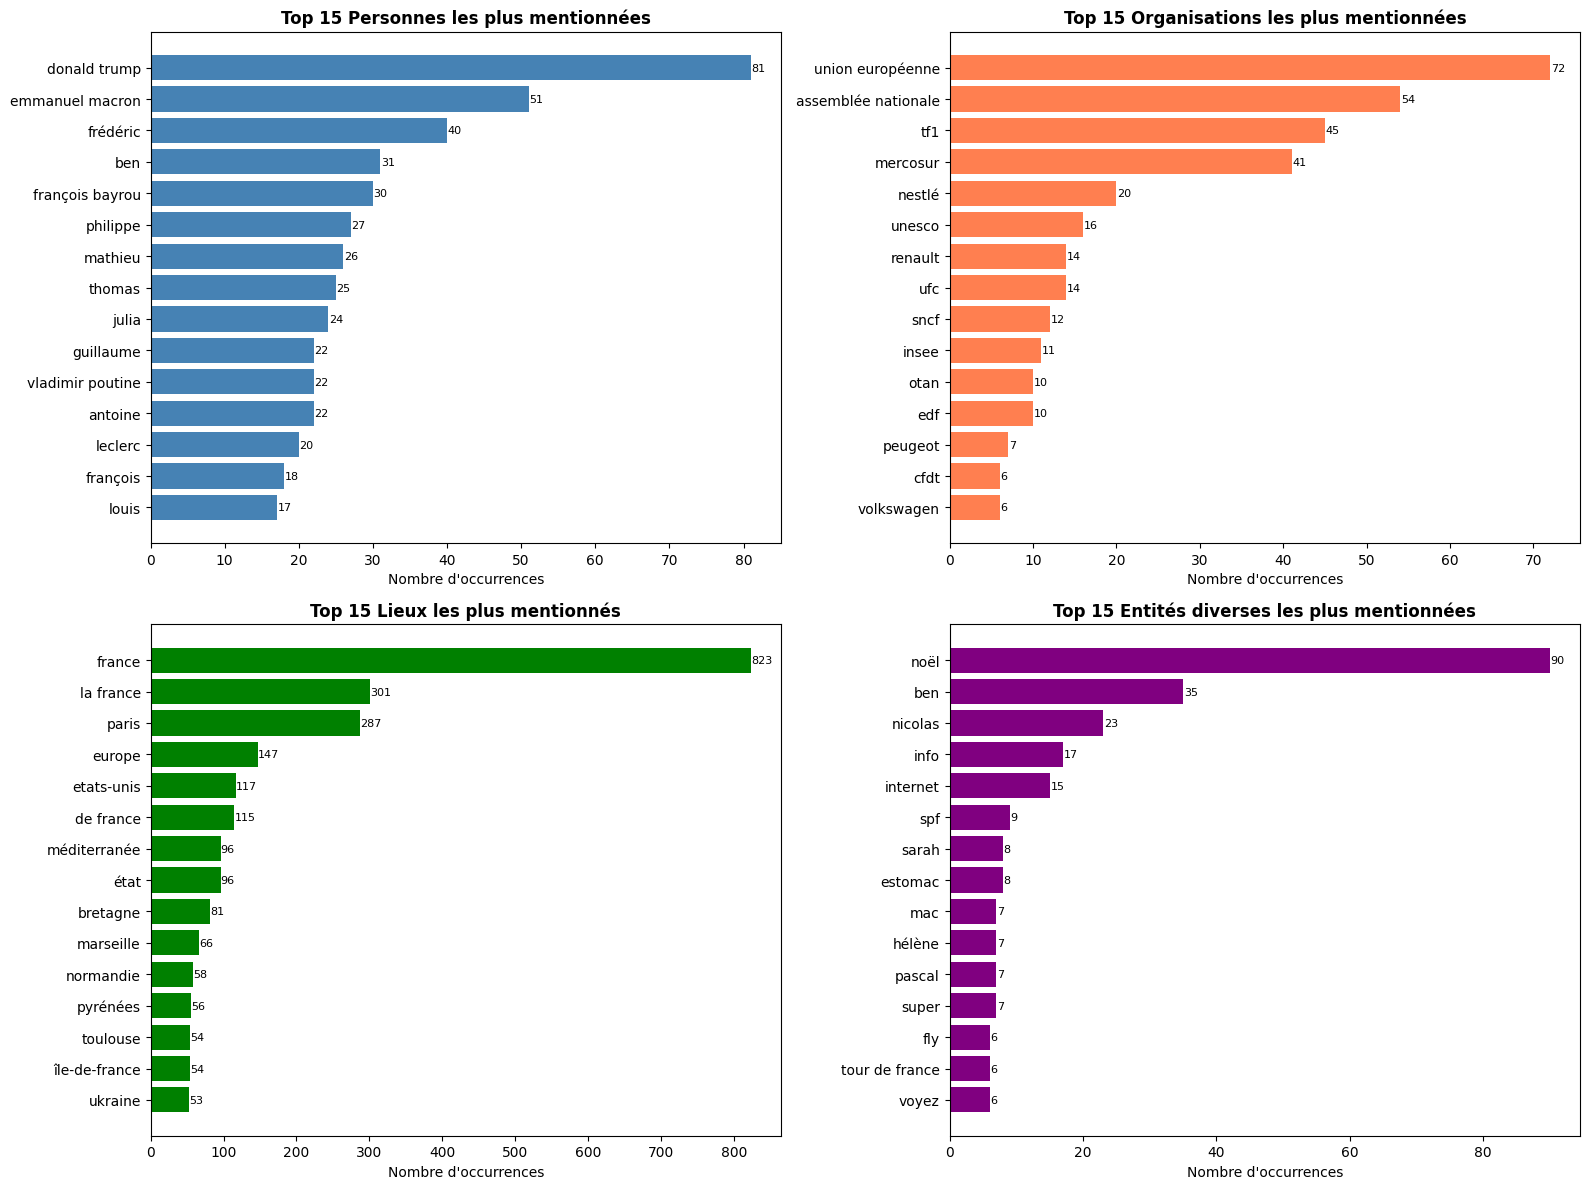

In [33]:
# Visualisation - Top entités (toutes catégories)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 15 personnes
top_persons = persons_counter.most_common(15)
persons_names = [p[0][:35] for p in top_persons]  # Truncate long names
persons_counts = [p[1] for p in top_persons]

axes[0,0].barh(persons_names, persons_counts, color='steelblue')
axes[0,0].set_xlabel('Nombre d\'occurrences', fontsize=10)
axes[0,0].set_title('Top 15 Personnes les plus mentionnées', fontsize=12, fontweight='bold')
axes[0,0].invert_yaxis()
for i, v in enumerate(persons_counts):
    axes[0,0].text(v + 0.1, i, str(v), va='center', fontsize=8)

# Top 15 organisations
top_orgs = orgs_counter.most_common(15)
orgs_names = [o[0][:35] for o in top_orgs]
orgs_counts = [o[1] for o in top_orgs]

axes[0,1].barh(orgs_names, orgs_counts, color='coral')
axes[0,1].set_xlabel('Nombre d\'occurrences', fontsize=10)
axes[0,1].set_title('Top 15 Organisations les plus mentionnées', fontsize=12, fontweight='bold')
axes[0,1].invert_yaxis()
for i, v in enumerate(orgs_counts):
    axes[0,1].text(v + 0.1, i, str(v), va='center', fontsize=8)

# Top 15 lieux
top_locations = locations_counter.most_common(15)
locations_names = [l[0][:35] for l in top_locations]
locations_counts = [l[1] for l in top_locations]

axes[1,0].barh(locations_names, locations_counts, color='green')
axes[1,0].set_xlabel('Nombre d\'occurrences', fontsize=10)
axes[1,0].set_title('Top 15 Lieux les plus mentionnés', fontsize=12, fontweight='bold')
axes[1,0].invert_yaxis()
for i, v in enumerate(locations_counts):
    axes[1,0].text(v + 0.1, i, str(v), va='center', fontsize=8)

# Top 15 entités diverses
top_misc = misc_counter.most_common(15)
misc_names = [m[0][:35] for m in top_misc]
misc_counts = [m[1] for m in top_misc]

axes[1,1].barh(misc_names, misc_counts, color='purple')
axes[1,1].set_xlabel('Nombre d\'occurrences', fontsize=10)
axes[1,1].set_title('Top 15 Entités diverses les plus mentionnées', fontsize=12, fontweight='bold')
axes[1,1].invert_yaxis()
for i, v in enumerate(misc_counts):
    axes[1,1].text(v + 0.1, i, str(v), va='center', fontsize=8)

plt.tight_layout()
plt.show()

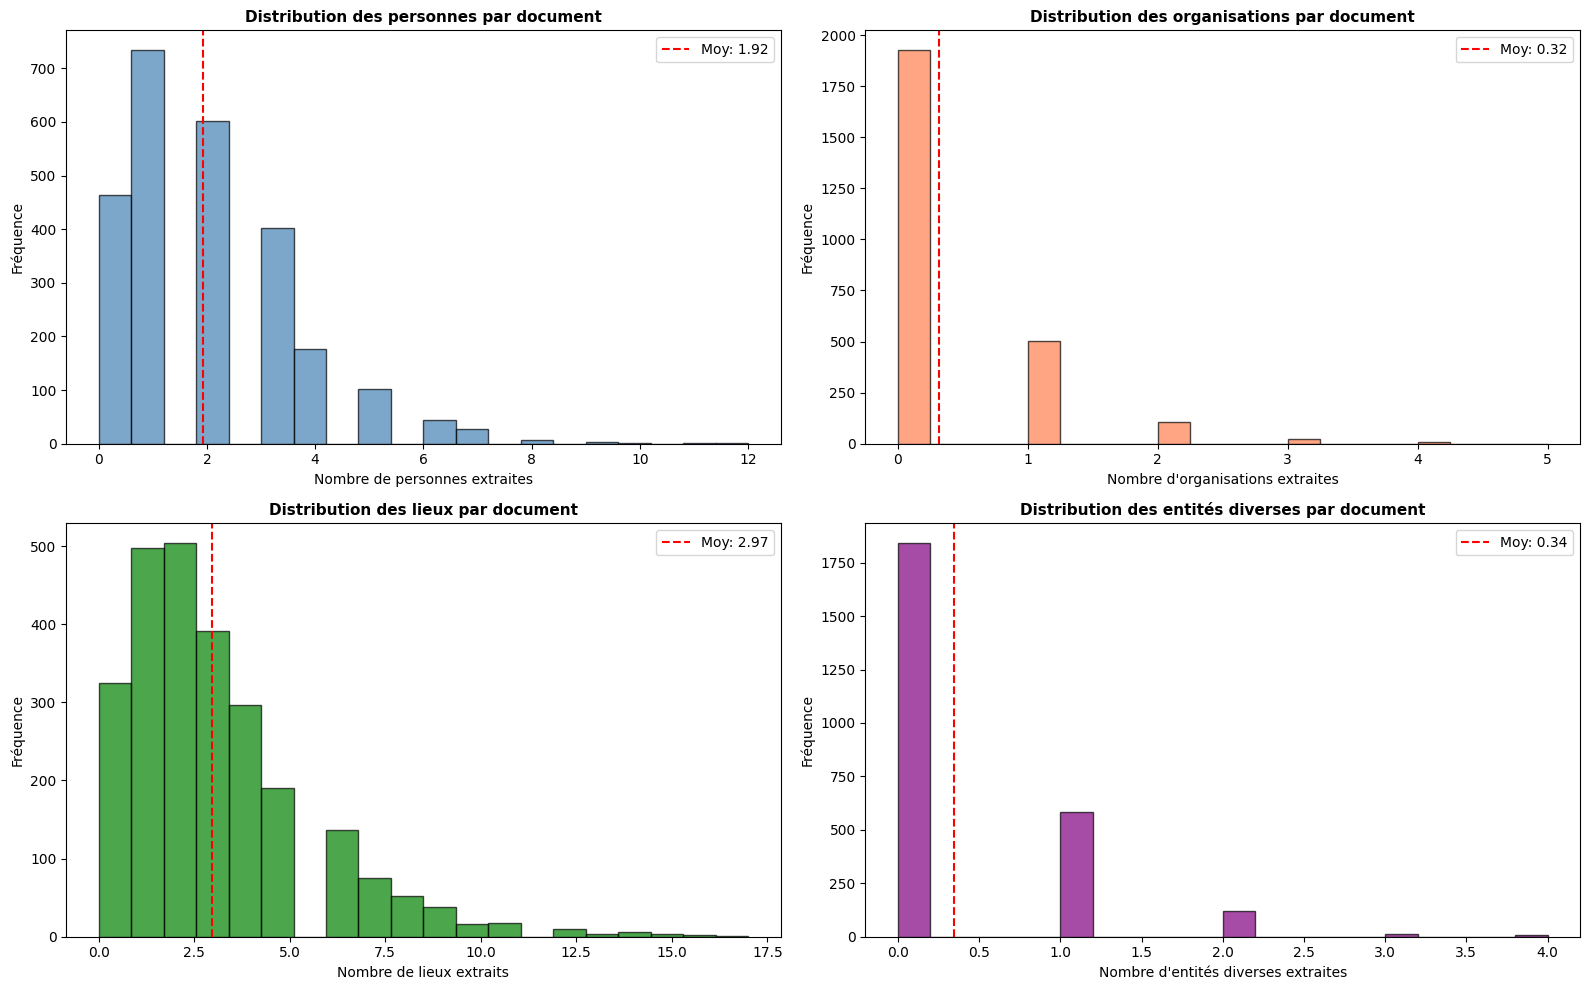


Statistiques sur le nombre d'entités par document:
Personnes - Min: 0, Max: 12, Moy: 1.92, Médiane: 2
Organisations - Min: 0, Max: 5, Moy: 0.32, Médiane: 0
Lieux - Min: 0, Max: 17, Moy: 2.97, Médiane: 2
Entités diverses - Min: 0, Max: 4, Moy: 0.34, Médiane: 0


In [34]:
# Distribution des nombres d'entités par document
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Nombre de personnes par document
num_persons = df_agri['actor_persons'].apply(len)
axes[0,0].hist(num_persons, bins=20, color='steelblue', edgecolor='black', alpha=0.7)
axes[0,0].set_xlabel('Nombre de personnes extraites', fontsize=10)
axes[0,0].set_ylabel('Fréquence', fontsize=10)
axes[0,0].set_title('Distribution des personnes par document', fontsize=11, fontweight='bold')
axes[0,0].axvline(num_persons.mean(), color='red', linestyle='--', label=f'Moy: {num_persons.mean():.2f}')
axes[0,0].legend()

# Nombre d'organisations par document
num_orgs = df_agri['actor_organizations'].apply(len)
axes[0,1].hist(num_orgs, bins=20, color='coral', edgecolor='black', alpha=0.7)
axes[0,1].set_xlabel('Nombre d\'organisations extraites', fontsize=10)
axes[0,1].set_ylabel('Fréquence', fontsize=10)
axes[0,1].set_title('Distribution des organisations par document', fontsize=11, fontweight='bold')
axes[0,1].axvline(num_orgs.mean(), color='red', linestyle='--', label=f'Moy: {num_orgs.mean():.2f}')
axes[0,1].legend()

# Nombre de lieux par document
num_locations = df_agri['actor_locations'].apply(len)
axes[1,0].hist(num_locations, bins=20, color='green', edgecolor='black', alpha=0.7)
axes[1,0].set_xlabel('Nombre de lieux extraits', fontsize=10)
axes[1,0].set_ylabel('Fréquence', fontsize=10)
axes[1,0].set_title('Distribution des lieux par document', fontsize=11, fontweight='bold')
axes[1,0].axvline(num_locations.mean(), color='red', linestyle='--', label=f'Moy: {num_locations.mean():.2f}')
axes[1,0].legend()

# Nombre d'entités diverses par document
num_misc = df_agri['actor_misc'].apply(len)
axes[1,1].hist(num_misc, bins=20, color='purple', edgecolor='black', alpha=0.7)
axes[1,1].set_xlabel('Nombre d\'entités diverses extraites', fontsize=10)
axes[1,1].set_ylabel('Fréquence', fontsize=10)
axes[1,1].set_title('Distribution des entités diverses par document', fontsize=11, fontweight='bold')
axes[1,1].axvline(num_misc.mean(), color='red', linestyle='--', label=f'Moy: {num_misc.mean():.2f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()

print(f"\nStatistiques sur le nombre d'entités par document:")
print(f"Personnes - Min: {num_persons.min()}, Max: {num_persons.max()}, Moy: {num_persons.mean():.2f}, Médiane: {num_persons.median():.0f}")
print(f"Organisations - Min: {num_orgs.min()}, Max: {num_orgs.max()}, Moy: {num_orgs.mean():.2f}, Médiane: {num_orgs.median():.0f}")
print(f"Lieux - Min: {num_locations.min()}, Max: {num_locations.max()}, Moy: {num_locations.mean():.2f}, Médiane: {num_locations.median():.0f}")
print(f"Entités diverses - Min: {num_misc.min()}, Max: {num_misc.max()}, Moy: {num_misc.mean():.2f}, Médiane: {num_misc.median():.0f}")

In [35]:
# Analyse des thèmes associés aux acteurs principaux
print("="*80)
print("THÈMES ASSOCIÉS AUX ACTEURS PRINCIPAUX")
print("="*80)

# Top 10 acteurs
top_10_persons = [p[0] for p in persons_counter.most_common(10)]
top_10_orgs = [o[0] for o in orgs_counter.most_common(10)]

# Pour chaque acteur principal, extraire les thèmes
for person in top_10_persons:
    rows_with_person = df_agri[df_agri['actor_persons'].apply(lambda x: person in x)]
    if len(rows_with_person) > 0:
        themes = rows_with_person['themes'].dropna()
        print(f"\n{person}:")
        print(f"  Documents: {len(rows_with_person)}")
        if len(themes) > 0 and isinstance(themes.iloc[0], (list, str)):
            print(f"  Exemple de thèmes: {themes.iloc[0]}")

THÈMES ASSOCIÉS AUX ACTEURS PRINCIPAUX

donald trump:
  Documents: 81
  Exemple de thèmes: , biodiversite_concepts_generaux_indirectes, changement_climatique_constat_indirectes

emmanuel macron:
  Documents: 51
  Exemple de thèmes: , attenuation_climatique_solutions, biodiversite_causes, biodiversite_causes_indirectes, biodiversite_concepts_generaux, biodiversite_concepts_generaux_indirectes, biodiversite_solutions, changement_climatique_causes, changement_climatique_consequences_indirectes, changement_climatique_constat, changement_climatique_constat_indirectes, ressources, ressources_indirectes, ressources_solutions

frédéric:
  Documents: 40
  Exemple de thèmes: biodiversite_concepts_generaux, biodiversite_solutions, changement_climatique_constat_indirectes, ressources_indirectes

ben:
  Documents: 31
  Exemple de thèmes: , adaptation_climatique_solutions_indirectes, biodiversite_concepts_generaux_indirectes, changement_climatique_causes_indirectes, changement_climatique_constat_ind

In [36]:
# Analyse de co-occurrence : personnes et organisations dans le même document
print("="*80)
print("CO-OCCURRENCE PERSONNES-ORGANISATIONS")
print("="*80)

cooccurrence = []
for idx, row in df_agri.iterrows():
    persons = row['actor_persons']
    orgs = row['actor_organizations']
    if len(persons) > 0 and len(orgs) > 0:
        for person in persons:
            for org in orgs:
                cooccurrence.append((person, org))

cooccurrence_counter = Counter(cooccurrence)
print(f"\nNombre total de paires (personne, organisation): {len(cooccurrence)}")
print(f"Nombre de paires uniques: {len(cooccurrence_counter)}")

print("\nTop 20 paires (personne, organisation):")
for (person, org), count in cooccurrence_counter.most_common(20):
    print(f"  {person:35s} <-> {org:35s} | {count} co-occurrences")

CO-OCCURRENCE PERSONNES-ORGANISATIONS

Nombre total de paires (personne, organisation): 1750
Nombre de paires uniques: 1677

Top 20 paires (personne, organisation):
  emmanuel macron                     <-> mercosur                            | 7 co-occurrences
  donald trump                        <-> union européenne                    | 6 co-occurrences
  françois bayrou                     <-> assemblée nationale                 | 4 co-occurrences
  bruce toussaint                     <-> tf1                                 | 4 co-occurrences
  bernard arnault                     <-> lvmh                                | 3 co-occurrences
  johanna                             <-> assemblée nationale                 | 3 co-occurrences
  emmanuel                            <-> mercosur                            | 3 co-occurrences
  emmanuel                            <-> union européenne                    | 3 co-occurrences
  mathieu                             <-> union européenne 

In [37]:
# Nettoyage et affinage des entités : déduplication et normalisation
print("="*80)
print("AFFINAGE DES ENTITÉS - DÉDUPLICATION")
print("="*80)

def normalize_entity(entity: str) -> str:
    """Normalize entity names: lowercase, remove extra spaces"""
    return ' '.join(entity.lower().split())

def merge_similar_entities(entities_counter, threshold=0.85):
    """Merge similar entities using string similarity"""
    from difflib import SequenceMatcher
    
    merged = Counter()
    processed = set()
    
    for entity in entities_counter.keys():
        if entity in processed:
            continue
        
        # Trouver les entités similaires
        similar = [entity]
        for other_entity in entities_counter.keys():
            if other_entity != entity and other_entity not in processed:
                similarity = SequenceMatcher(None, entity.lower(), other_entity.lower()).ratio()
                if similarity > threshold:
                    similar.append(other_entity)
                    processed.add(other_entity)
        
        # Fusionner les entités similaires
        merged[entity] = sum(entities_counter[e] for e in similar)
        processed.add(entity)
    
    return merged

# Affiner les organisations (plus de doublons)
print("\nAffinage des organisations...")
orgs_refined = merge_similar_entities(orgs_counter, threshold=0.90)

print(f"Avant affinage: {len(orgs_counter)} organisations uniques")
print(f"Après affinage: {len(orgs_refined)} organisations uniques")

print("\nTop 15 organisations AFFINÉES:")
for org, count in orgs_refined.most_common(15):
    print(f"  {org:50s} | {count:3d} occurrences")

AFFINAGE DES ENTITÉS - DÉDUPLICATION

Affinage des organisations...
Avant affinage: 345 organisations uniques
Après affinage: 340 organisations uniques

Top 15 organisations AFFINÉES:
  union européenne                                   |  73 occurrences
  assemblée nationale                                |  55 occurrences
  tf1                                                |  45 occurrences
  mercosur                                           |  41 occurrences
  nestlé                                             |  20 occurrences
  unesco                                             |  16 occurrences
  renault                                            |  14 occurrences
  ufc                                                |  14 occurrences
  sncf                                               |  12 occurrences
  insee                                              |  11 occurrences
  otan                                               |  10 occurrences
  edf                              

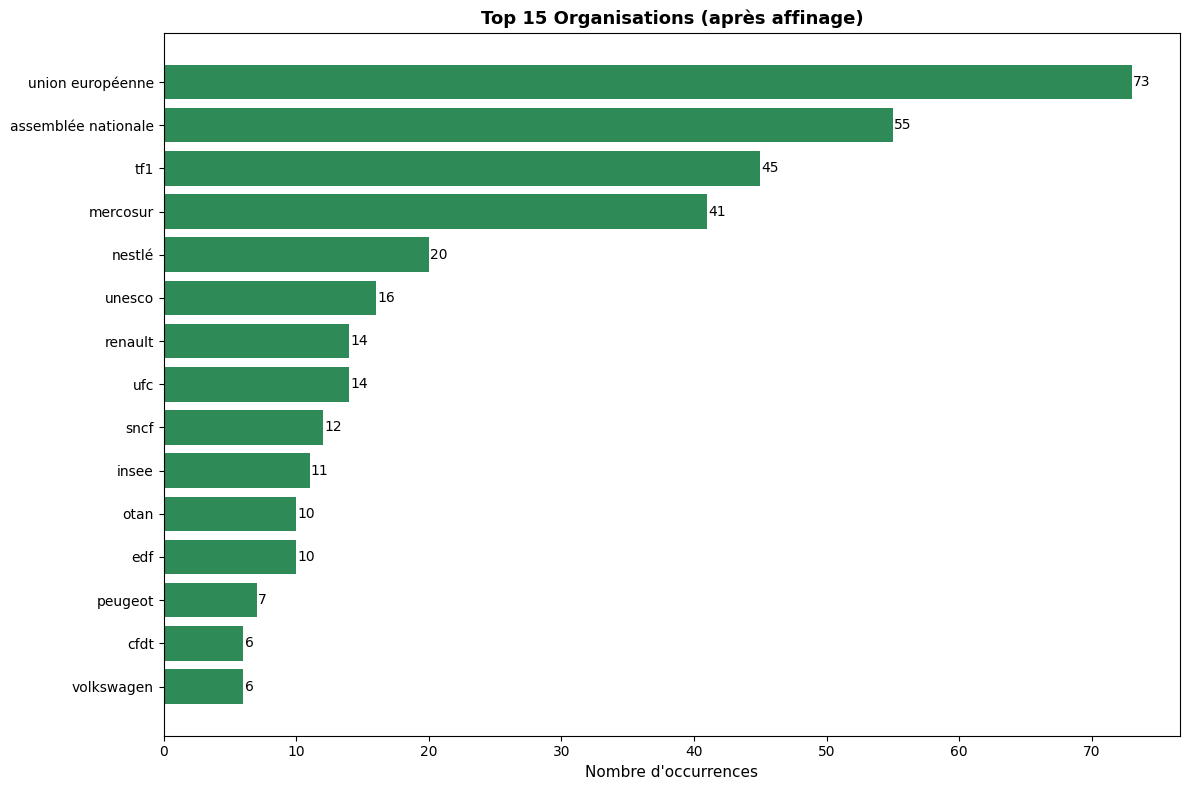

In [38]:
# Visualisation des organisations affinées
top_orgs_refined = orgs_refined.most_common(15)
orgs_names_refined = [o[0][:40] for o in top_orgs_refined]
orgs_counts_refined = [o[1] for o in top_orgs_refined]

plt.figure(figsize=(12, 8))
plt.barh(orgs_names_refined, orgs_counts_refined, color='seagreen')
plt.xlabel('Nombre d\'occurrences', fontsize=11)
plt.title('Top 15 Organisations (après affinage)', fontsize=13, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(orgs_counts_refined):
    plt.text(v + 0.1, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [39]:
# Résumé final et export
print("\n" + "="*80)
print("RÉSUMÉ FINAL DE L'ANALYSE NER")
print("="*80)
print(f"\nDataset agriculture_alimentation:")
print(f"  - Nombre de documents: {len(df_agri)}")
print(f"  - Documents avec au moins une personne: {(num_persons > 0).sum()} ({(num_persons > 0).sum()/len(df_agri)*100:.1f}%)")
print(f"  - Documents avec au moins une organisation: {(num_orgs > 0).sum()} ({(num_orgs > 0).sum()/len(df_agri)*100:.1f}%)")
print(f"  - Documents avec au moins un lieu: {(num_locations > 0).sum()} ({(num_locations > 0).sum()/len(df_agri)*100:.1f}%)")
print(f"  - Documents avec au moins une entité diverse: {(num_misc > 0).sum()} ({(num_misc > 0).sum()/len(df_agri)*100:.1f}%)")
print(f"\nPersonnes extraites:")
print(f"  - Total unique: {len(set(all_persons))}")
print(f"  - Total d'occurrences: {len(all_persons)}")
print(f"  - Densité moyenne par document: {num_persons.mean():.2f}")
print(f"\nOrganisations extraites:")
print(f"  - Total unique (avant affinage): {len(orgs_counter)}")
print(f"  - Total unique (après affinage): {len(orgs_refined)}")
print(f"  - Total d'occurrences: {len(all_orgs)}")
print(f"  - Densité moyenne par document: {num_orgs.mean():.2f}")
print(f"\nLieux extraits:")
print(f"  - Total unique: {len(set(all_locations))}")
print(f"  - Total d'occurrences: {len(all_locations)}")
print(f"  - Densité moyenne par document: {num_locations.mean():.2f}")
print(f"\nEntités diverses extraites:")
print(f"  - Total unique: {len(set(all_misc))}")
print(f"  - Total d'occurrences: {len(all_misc)}")
print(f"  - Densité moyenne par document: {num_misc.mean():.2f}")

# Total de toutes les entités
total_entities = len(all_persons) + len(all_orgs) + len(all_locations) + len(all_misc)
total_unique = len(set(all_persons)) + len(set(all_orgs)) + len(set(all_locations)) + len(set(all_misc))
print(f"\n📊 TOTAL GÉNÉRAL:")
print(f"  - Total d'entités extraites: {total_entities:,}")
print(f"  - Total d'entités uniques: {total_unique:,}")
print(f"  - Densité moyenne par document: {total_entities/len(df_agri):.2f} entités/document")


RÉSUMÉ FINAL DE L'ANALYSE NER

Dataset agriculture_alimentation:
  - Nombre de documents: 2565
  - Documents avec au moins une personne: 2101 (81.9%)
  - Documents avec au moins une organisation: 638 (24.9%)
  - Documents avec au moins un lieu: 2240 (87.3%)
  - Documents avec au moins une entité diverse: 723 (28.2%)

Personnes extraites:
  - Total unique: 3248
  - Total d'occurrences: 4935
  - Densité moyenne par document: 1.92

Organisations extraites:
  - Total unique (avant affinage): 345
  - Total unique (après affinage): 340
  - Total d'occurrences: 814
  - Densité moyenne par document: 0.32

Lieux extraits:
  - Total unique: 1686
  - Total d'occurrences: 7615
  - Densité moyenne par document: 2.97

Entités diverses extraites:
  - Total unique: 505
  - Total d'occurrences: 884
  - Densité moyenne par document: 0.34

📊 TOTAL GÉNÉRAL:
  - Total d'entités extraites: 14,248
  - Total d'entités uniques: 5,784
  - Densité moyenne par document: 5.55 entités/document
